In [13]:
from pyvis.network import Network
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

# Opening JSON files... also turning them into Python Dictionaries??
with open('../api/devices/all.json', 'r') as openfile:
    all = json.load(openfile)
# with open('../api_flats/api_flats/devices/all.json', 'r') as openfile:
#     all = json.load(openfile)

with open('../api/devices/phydot11_accesspoints.json', 'r') as openfile:
    aps = json.load(openfile)

with open('../api/devices/phy-Bluetooth.json', 'r') as openfile:
    blue = json.load(openfile)

with open('../api/devices/phy-IEEE802.11.json', 'r') as openfile:
    wlan = json.load(openfile)

#print(all)

# Collecting info on all devices
all_df = pd.DataFrame()

all_count = 0

for device in all:   
    try:
        x = [device['dot11.device']['dot11.device.probed_ssid_map'][0]['dot11.probedssid.ssid']]
    except KeyError:
        x = "None"
    all_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']],
        "server_uuid": [device['kismet.server.uuid']],
        "network": x
    }
    all_count += 1
    
    all_df = pd.concat([all_df, pd.DataFrame(all_data)], ignore_index=True)

#print("All Devices:", all_count, "len:", len(all_df))

# Collecting info on wlan devices
wlan_df = pd.DataFrame()

wlan_count = 0

for device in wlan:
    try:
        x = [device['dot11.device']['dot11.device.probed_ssid_map'][0]['dot11.probedssid.ssid']]
    except KeyError:
        x = "None"    
    wlan_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']],
        "server_uuid": [device['kismet.server.uuid']],
        "network": x
    }
    wlan_count += 1
    
    wlan_df = pd.concat([wlan_df, pd.DataFrame(wlan_data)], ignore_index=True)

#print("WLAN Devices:", wlan_count, "len:", len(wlan_df))

# Collecting info on bluetooth devices
blue_df = pd.DataFrame()

blue_count = 0

for device in blue:    
    blue_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']],
        "server_uuid": [device['kismet.server.uuid']]
    }
    blue_count += 1
    
    blue_df = pd.concat([blue_df, pd.DataFrame(blue_data)], ignore_index=True)

#print("Bluetooth Devices:", blue_count, "len:", len(blue_df))

# Collecting info on access points
aps_df = pd.DataFrame()

aps_count = 0

for device in aps:    
    aps_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']],
        "server_uuid": [device['kismet.server.uuid']]
    }
    aps_count += 1
    
    aps_df = pd.concat([aps_df, pd.DataFrame(aps_data)], ignore_index=True)

#print("Access Points:", aps_count, "len:", len(aps_df))


# Finding intersecting elements
#list(reduce(set.intersection, map(set, [aps_df.macaddr, wlan_df.macaddr])))
#list(reduce(set.intersection, reduce(set.union, map(set, [aps_df.macaddr, wlan_df.macaddr, blue_df.macaddr]))), reduce(set, [all_df]))
#reduce(set.union, map(set, [aps_df.macaddr, wlan_df.macaddr, blue_df.macaddr]))
#reduce(set, [all_df])
#list(reduce(set.intersection, map(set, [aps_df.macaddr, wlan_df.macaddr])))
# a = set(aps_df.macaddr)
# b = set(wlan_df.macaddr)
# c = set(blue_df.macaddr)
# d = set(all_df.macaddr)
# e = reduce(set.union, [a,b,c])
# f = reduce(set.difference, [d, e])
# print(len(e))
# print(len(reduce(set.difference, [b, d])))
# list(f)
# print(len(f))
#g = d.issuperset(e)
#print(g)



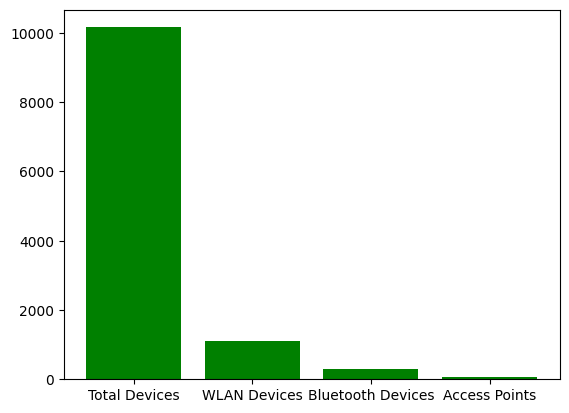

In [7]:
devs = ['Total Devices', 'WLAN Devices', 'Bluetooth Devices', 'Access Points']
devs_counts = [len(all_df), len(wlan_df), len(blue_df), len(aps_df)]
x = np.char.array(devs)
y = np.array(devs_counts)
fig = plt.bar(x, y, color='green')

Note: When I also counted the access points, #access points + # WLAN devices + # Bluetooth Devices > # All Devices,
so I'm going to look into what overlap might be happening between aps/wlan/bluetooth and why.
Something else of note: 

<class 'pandas.core.series.Series'>


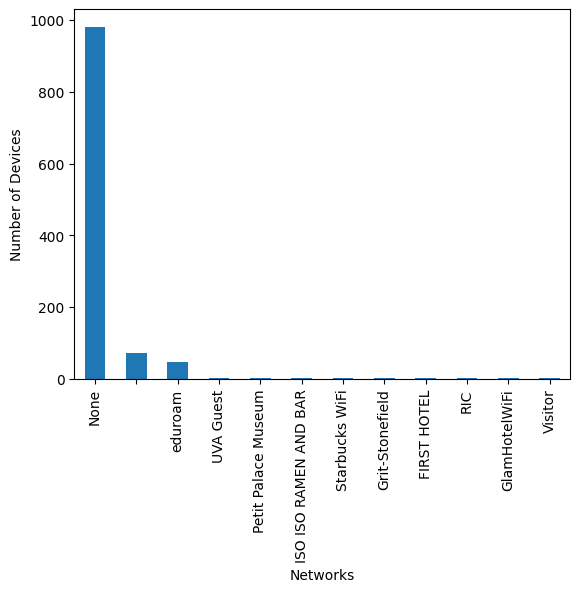

In [9]:
wlan_df['network'].value_counts().plot(kind='bar', ylabel="Number of Devices", xlabel="Networks")

<BarContainer object of 65 artists>

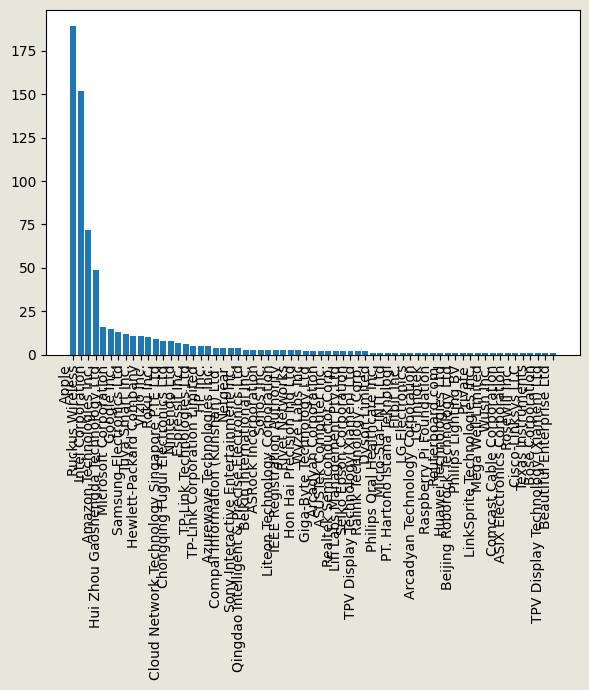

In [11]:
# all_df['manuf'].value_counts().plot(kind='bar', ylabel="Number of Devices", xlabel="Manufacturer")
dev_manuf = all_df['manuf'].value_counts().index.tolist()
dev_manuf_counts = all_df['manuf'].value_counts().tolist()
if(dev_manuf[0] == "Unknown"):
    dev_manuf.pop(0)
    dev_manuf_counts.pop(0)
x = np.char.array(dev_manuf)
y = np.array(dev_manuf_counts)
fig, ax = plt.subplots(figsize = (6,7))
plt.xticks(rotation=90, ha='right')
fig.set_tight_layout(True)
fig.patch.set_facecolor('#E8E5DA')
plt.bar(x, y, figure=fig)

Text(0, 0.5, 'Frequency Distribution of Device Manufacturer')

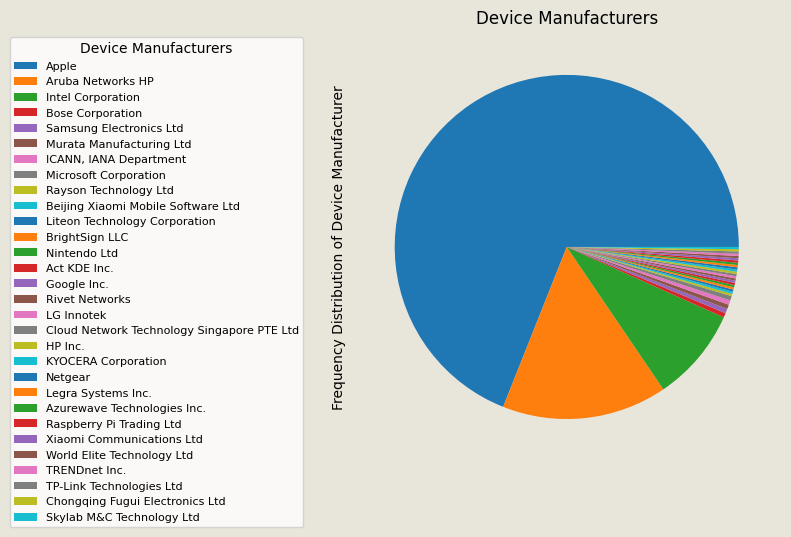

In [48]:
# manufacturers = all_df['manuf'].value_counts().index.tolist()
# man_counts = all_df['manuf'].value_counts().tolist()

# x = np.char.array(manufacturers)
# y = np.array(man_counts)
# percents = 100.*y/y.sum()
# patches, texts = plt.pie(y)
# labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percents)]

# sort_legend = True
# if sort_legend:
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
#                                           key=lambda x: x[2],
#                                           reverse=True))

# plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
#            fontsize=8, title='Device Manufacturers')

# plt.savefig('piechart.png', bbox_inches='tight')

fig, ax = plt.subplots(figsize = (8,8))
fig.set_tight_layout(True)
fig.patch.set_facecolor('#E8E5DA')

fig = all_df[~all_df["manuf"].str.contains('Unknown', na=False)]['manuf'].value_counts().plot(kind='pie', legend=True, title="Device Manufacturers", labeldistance=None) #autopct="%1.0f%%"
fig.legend(loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8, title='Device Manufacturers')

plt.ylabel("Frequency Distribution of Device Manufacturer", size = 10)

Text(0, 0.5, 'Frequency Distribution of Device Type')

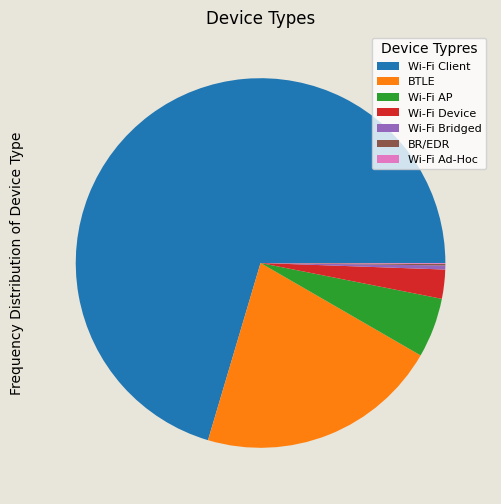

In [53]:
# Graph for percentages of different device types

# dev_types = all_df['device_type'].value_counts().index.tolist()
# dev_type_counts = all_df['device_type'].value_counts().tolist()

# x = np.char.array(dev_types)
# y = np.array(dev_type_counts)
# percents = 100.*y/y.sum()
# patches, texts = plt.pie(y)
# labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percents)]

# sort_legend = True
# if sort_legend:
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
#                                           key=lambda x: x[2],
#                                           reverse=True))

# plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
#            fontsize=8, title='Device Types')

# plt.savefig('piechart.png', bbox_inches='tight')

fig, ax = plt.subplots(figsize = (6,6))
fig.patch.set_facecolor('#E8E5DA')

fig = all_df[~all_df["device_type"].str.contains('Unknown', na=False)]['device_type'].value_counts().plot(kind='pie', legend=True, title="Device Types", labeldistance=None) #autopct="%1.0f%%"
fig.legend(loc='upper right', bbox_to_anchor=(1, 1.),
        fontsize=8, title='Device Typres')

plt.ylabel("Frequency Distribution of Device Type", size = 10)
